In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.linear_model import SGDRegressor

In [3]:
# ---------------------------
# User-specified number of features (the first 'num_features' columns are independent variables)
# ---------------------------
num_features = 2  # Change this value to use more features

In [5]:
# ---------------------------
# Step 1: Pop-up file selection dialog to read CSV data
# ---------------------------
# Hide the main Tkinter window
root = Tk()
root.withdraw()

# Open file selection dialog (choose a CSV file)
filename = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
if not filename:
    raise ValueError("No file selected!")

# Read the CSV file.
# If your CSV file contains a header, remove or modify 'header=None'
data = pd.read_csv(filename)

# The first 'num_features' columns are features (X), and the last column is the target (y)
X = data.iloc[:, :num_features].values
y = data.iloc[:, -1].values

In [7]:
# ---------------------------
# Step 2: Multiple Linear Regression using Gradient Descent (via SGDRegressor)
# ---------------------------
model = SGDRegressor(loss='squared_error',
                     penalty=None,
                     learning_rate='constant',
                     eta0=0.01,
                     max_iter=1,         # Each partial_fit does one epoch
                     warm_start=True,
                     random_state=42)

num_iterations = 1000  # Total number of iterations
cost_history = []      # List to record cost at each iteration

# Use partial_fit in a loop to simulate gradient descent
for i in range(num_iterations):
    model.partial_fit(X, y)
    predictions = model.predict(X)
    # Compute the cost function: J = (1/2m) * Σ(prediction - y)^2
    cost = np.mean((predictions - y) ** 2) / 2
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}")

Iteration 0, Cost: 271.3797468752137
Iteration 100, Cost: 1.033976907158592e+23
Iteration 200, Cost: 1.033976907158592e+23
Iteration 300, Cost: 1.033976907158592e+23
Iteration 400, Cost: 1.033976907158592e+23
Iteration 500, Cost: 1.033976907158592e+23
Iteration 600, Cost: 1.033976907158592e+23
Iteration 700, Cost: 1.033976907158592e+23
Iteration 800, Cost: 1.033976907158592e+23
Iteration 900, Cost: 1.033976907158592e+23


In [9]:
# ---------------------------
# Step 3: Print the Final Fitted Equation
# ---------------------------
# For multiple linear regression, the equation is:
#    y = coef[0]*x1 + coef[1]*x2 + ... + intercept
equation = "y = "
for i in range(num_features):
    equation += f"{model.coef_[i]:.4f} * x{i+1} + "
equation += f"{model.intercept_[0]:.4f}"
print("\nFinal fitted equation:")
print(equation)


Final fitted equation:
y = -34832754912.4646 * x1 + -11325155163.0813 * x2 + 5876899937.3458


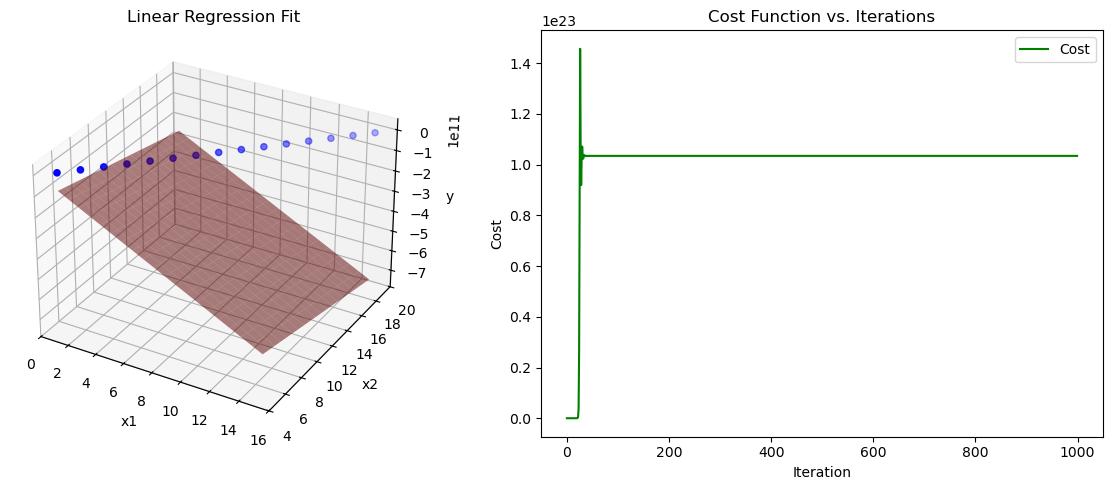

In [11]:
# ---------------------------
# Step 4: Plot the Results
# ---------------------------
if num_features == 1:
    # 2D plot: scatter plot with fitted line and cost vs iterations
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Data scatter and fitted line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue', label='Data Points')
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color='red', label='Fitted Line')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression Fit")
    plt.legend()
    
    # Subplot 2: Cost function vs. iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(num_iterations), cost_history, color='green', label='Cost')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Function vs. Iterations")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

elif num_features == 2:
    # 3D plot: scatter plot with fitted plane and cost vs iterations
    from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plotting
    
    fig = plt.figure(figsize=(12, 5))
    
    # Subplot 1: 3D scatter and fitted plane
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')
    
    # Create a grid to plot the fitted plane
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    y_pred_grid = model.predict(grid).reshape(x1_grid.shape)
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)
    
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_title("Linear Regression Fit")
    
    # Subplot 2: Cost function vs. iterations
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(range(num_iterations), cost_history, color='green', label='Cost')
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Cost")
    ax2.set_title("Cost Function vs. Iterations")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

else:
    # For more than 2 features, only plot the cost function vs iterations
    plt.figure(figsize=(6, 5))
    plt.plot(range(num_iterations), cost_history, color='green', label='Cost')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Function vs. Iterations")
    plt.legend()
    plt.tight_layout()
    plt.show()
